In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_ss', 'koi_fpflag_nt', 'koi_period', 'koi_fpflag_co', 'koi_prad', 'koi_steff', 'koi_duration', 'koi_time0bk', 'koi_kepmag', 'koi_model_snr', 'koi_duration_err2', 'koi_duration_err1', 
                       'koi_prad_err1', 'koi_steff_err1', 'koi_fpflag_ec', 'koi_prad_err2', 'koi_steff_err2', 'koi_time0bk_err1', 'koi_depth', 'koi_time0bk_err2', 'koi_period_err2', 'koi_insol_err1', 'koi_impact', 
                       'koi_period_err1', 'koi_insol_err2', 'koi_insol']]



# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
X = selected_features
y = df[['koi_disposition']]
print(X.shape, y.shape)

(6991, 26) (6991, 1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,koi_fpflag_ss,koi_fpflag_nt,koi_period,koi_fpflag_co,koi_prad,koi_steff,koi_duration,koi_time0bk,koi_kepmag,koi_model_snr,...,koi_steff_err2,koi_time0bk_err1,koi_depth,koi_time0bk_err2,koi_period_err2,koi_insol_err1,koi_impact,koi_period_err1,koi_insol_err2,koi_insol
6122,0,0,6.768901,0,1.24,5737,3.61600,133.077240,14.725,10.8,...,-171,0.008440,123.1,-0.008440,-7.380000e-05,204.89,0.150,7.380000e-05,-103.87,253.30
6370,1,0,0.733726,0,0.86,5855,2.30900,132.020050,15.770,13.8,...,-175,0.007950,114.6,-0.007950,-6.060000e-06,2253.61,0.291,6.060000e-06,-677.78,2891.64
2879,0,1,7.652707,0,3.21,6328,79.89690,134.460380,13.099,254.3,...,-189,0.006190,641.1,-0.006190,-6.540000e-05,195.16,0.970,6.540000e-05,-64.34,226.81
107,0,0,7.953547,0,2.25,4768,2.63120,174.662240,15.660,38.4,...,-85,0.001820,875.4,-0.001820,-1.910000e-05,7.15,0.300,1.910000e-05,-10.12,55.37
29,0,0,4.959319,0,12.21,5712,2.22739,172.258529,15.263,696.5,...,-77,0.000083,9802.0,-0.000083,-5.150000e-07,146.52,0.831,5.150000e-07,-93.21,349.40


In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train=label_encoder.transform(y_train)
encoded_y_test=label_encoder.transform(y_test)

print(X.shape, y.shape)

(6991, 26) (6991, 1)


C:\Users\brand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data

X_scaler = MinMaxScaler().fit(X)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.828
k: 3, Train/Test Score: 0.918/0.849
k: 5, Train/Test Score: 0.898/0.860
k: 7, Train/Test Score: 0.888/0.866
k: 9, Train/Test Score: 0.880/0.861
k: 11, Train/Test Score: 0.879/0.861
k: 13, Train/Test Score: 0.875/0.855
k: 15, Train/Test Score: 0.873/0.855
k: 17, Train/Test Score: 0.870/0.854
k: 19, Train/Test Score: 0.868/0.856


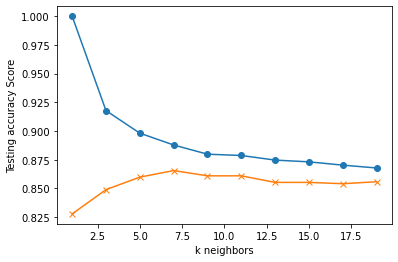

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, encoded_y_train)
    train_score = knn.score(X_train_scaled, encoded_y_train)
    test_score = knn.score(X_test_scaled, encoded_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, encoded_y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, encoded_y_test))

k=7 Test Acc: 0.866


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [10]:
# Create the GridSearchCV model
from sklearn.svm import SVC
classifier= SVC(kernel='linear')
classifier

SVC(kernel='linear')

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C': [1,5,10,50],
            'gamma': [0.0001, 0.005, 0.001, 0.005]}
grid = GridSearchCV (classifier, param_grid, verbose = 3)

In [12]:
# Train the model with GridSearch
#grid.fit(X_train, encoded_y_train)

In [13]:
print(grid.best_params_)


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
print(grid.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Brandy_Knust.sav'
joblib.dump(DecisionTree_RandomForest, filename)